In [1]:
# Imports
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics import tsaplots
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_predict
from tqdm import tqdm
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("NFLX.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-11,114.900002,116.629997,113.110001,114.779999,114.779999,11080300
1,2016-11-14,114.750000,115.900002,110.680000,113.379997,113.379997,9932400
2,2016-11-15,114.550003,116.410004,113.089996,113.589996,113.589996,7445100
3,2016-11-16,112.959999,116.120003,111.809998,115.190002,115.190002,5933700
4,2016-11-17,115.129997,116.809998,113.559998,115.029999,115.029999,6232700


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1510 non-null   object 
 1   Open       1510 non-null   float64
 2   High       1510 non-null   float64
 3   Low        1510 non-null   float64
 4   Close      1510 non-null   float64
 5   Adj Close  1510 non-null   float64
 6   Volume     1510 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 82.7+ KB


In [5]:
# Change date to datetime type
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1510 non-null   datetime64[ns]
 1   Open       1510 non-null   float64       
 2   High       1510 non-null   float64       
 3   Low        1510 non-null   float64       
 4   Close      1510 non-null   float64       
 5   Adj Close  1510 non-null   float64       
 6   Volume     1510 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 82.7 KB


In [7]:
df.shape

(1510, 7)

In [8]:
df.set_index("Date",inplace=True)

In [9]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-11,114.900002,116.629997,113.110001,114.779999,114.779999,11080300
2016-11-14,114.750000,115.900002,110.680000,113.379997,113.379997,9932400
2016-11-15,114.550003,116.410004,113.089996,113.589996,113.589996,7445100
2016-11-16,112.959999,116.120003,111.809998,115.190002,115.190002,5933700
2016-11-17,115.129997,116.809998,113.559998,115.029999,115.029999,6232700


In [10]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1.510000e+03
mean,346.822172,352.121496,341.198007,346.791338,346.791338,7.873689e+06
std,141.344723,142.983089,139.417911,141.148750,141.148750,6.497350e+06
min,112.959999,115.900002,110.680000,113.379997,113.379997,1.144000e+06
25%,224.917496,229.809994,220.910004,224.787498,224.787498,4.396225e+06
50%,343.104995,348.925003,337.529999,342.635010,342.635010,6.183600e+06
75%,480.089996,487.712502,474.302498,480.585007,480.585007,9.272250e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,1.333875e+08


In [12]:
df2 = pd.read_csv("NFLX.csv")
df2['Date'] = pd.to_datetime(df2['Date'])

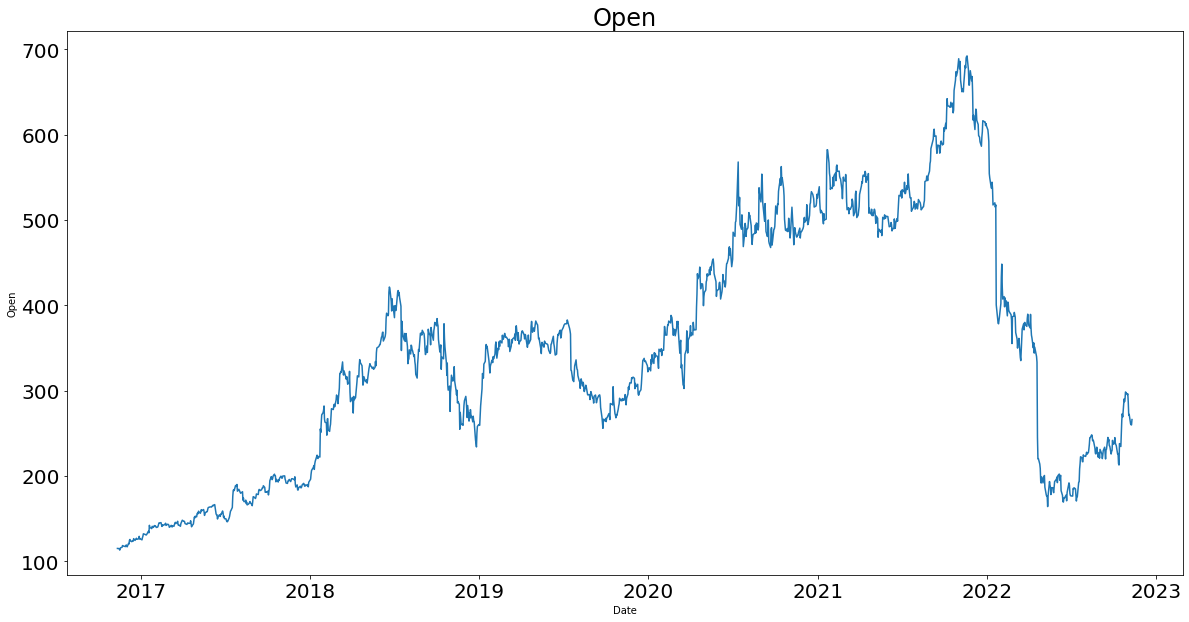

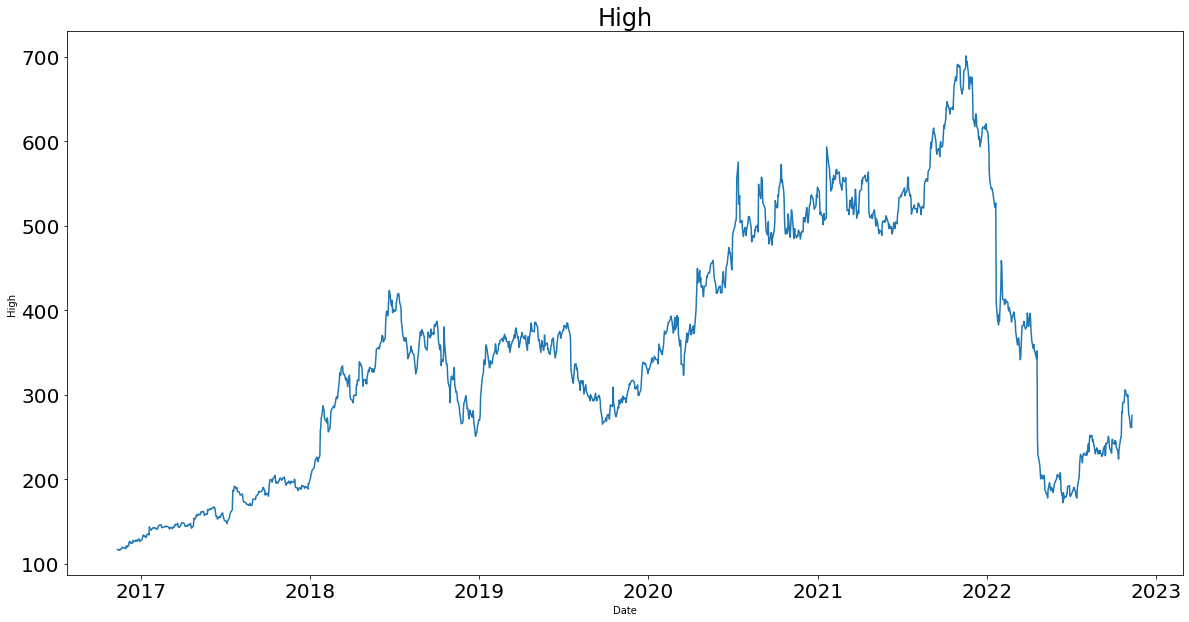

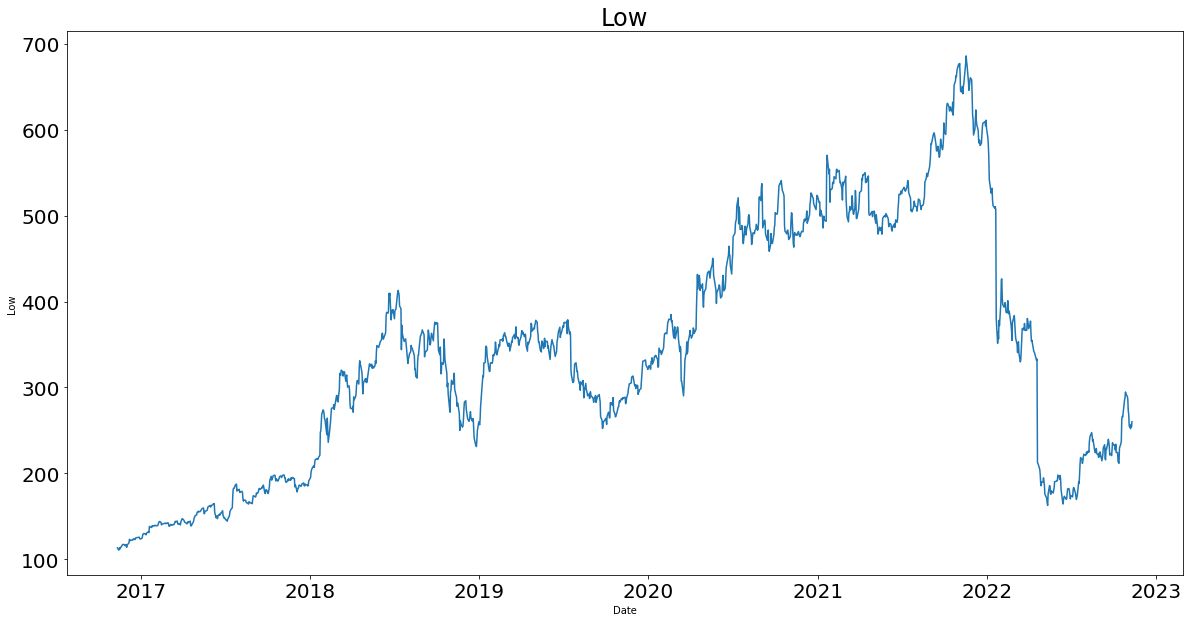

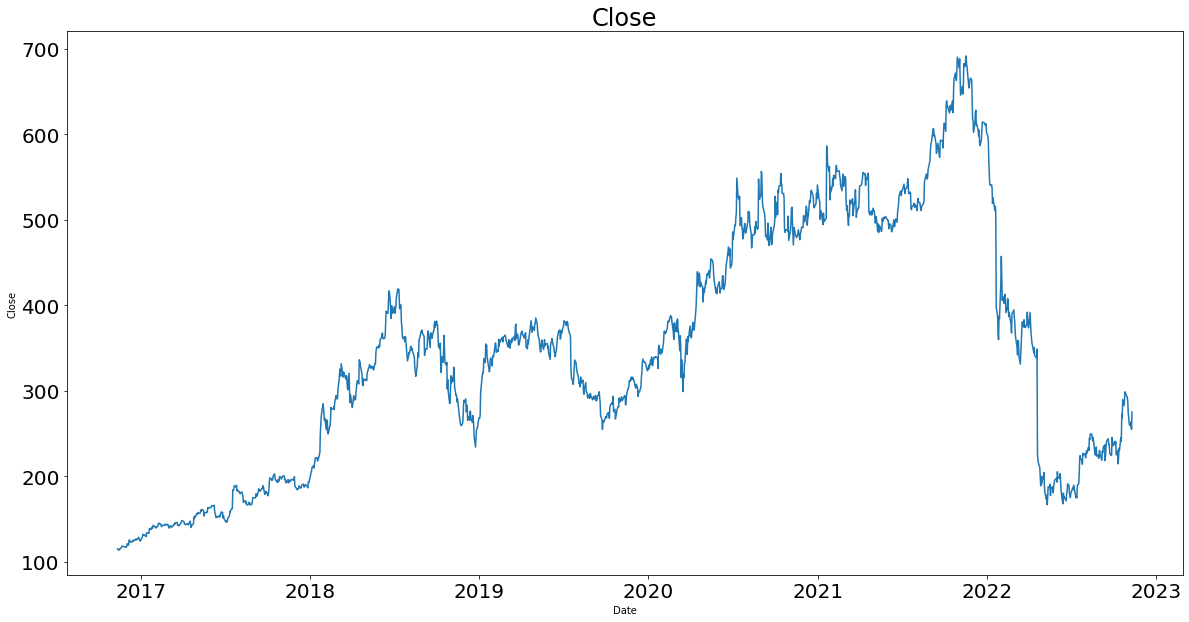

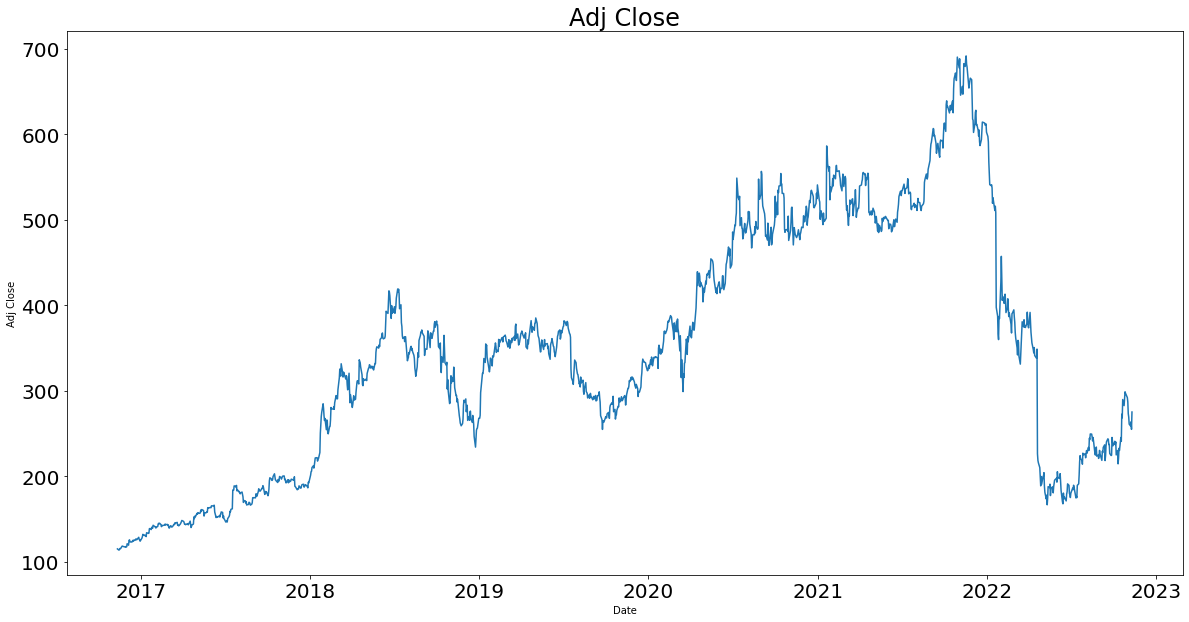

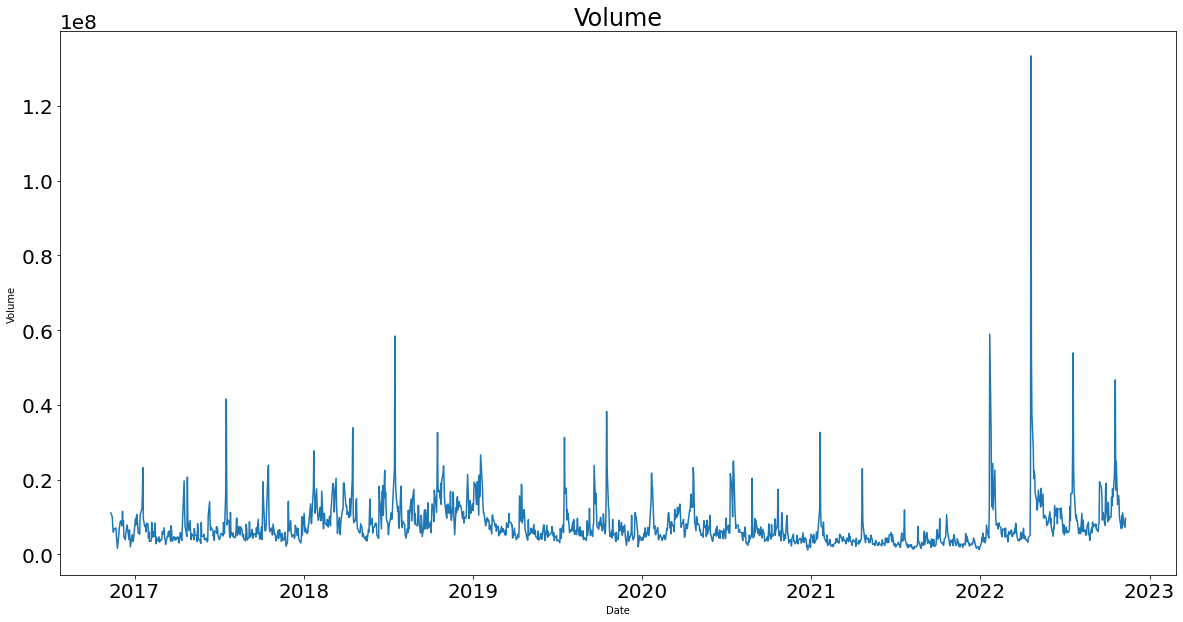

In [13]:
plt.rcParams["figure.figsize"] = (32,16)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

# Display all timeseries
for col in df.columns:
    plt.figure(figsize=(20,10))
    sns.lineplot(x = df.index ,y = df[col],data = df)
    plt.title(col , fontsize=24)
    plt.show()

<AxesSubplot:title={'center':'NFLX Opening Price Time Series'}, xlabel='Date', ylabel='Opening Price'>

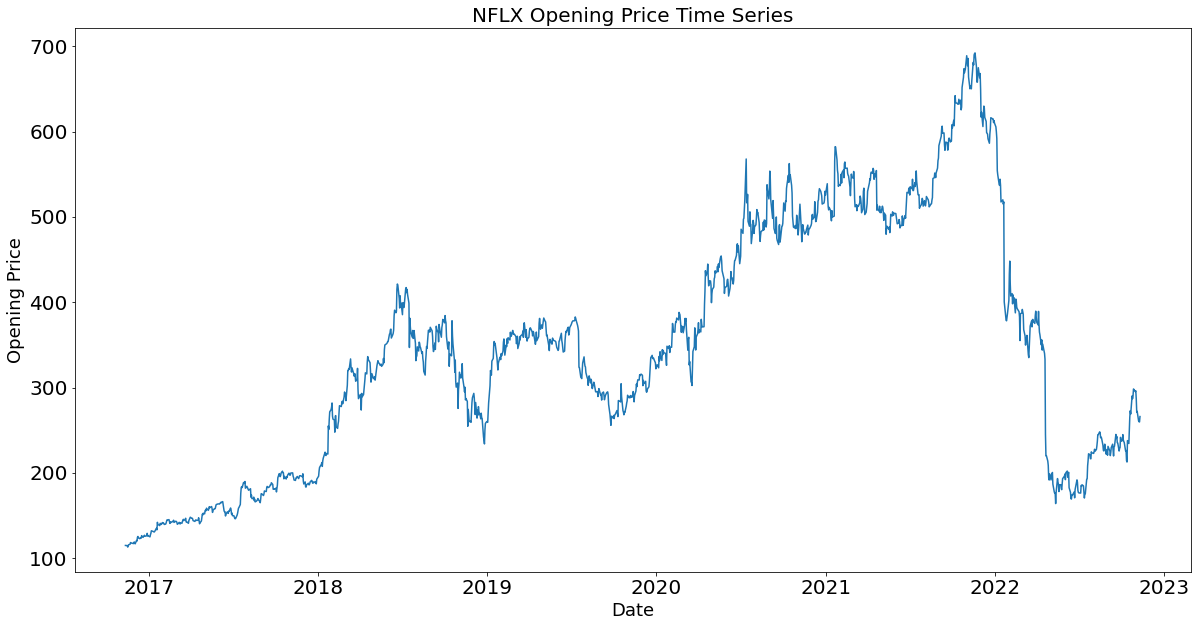

In [14]:
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.figure(figsize=(20,10))
plt.title('NFLX Opening Price Time Series', size=20)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Opening Price',fontsize = 18)
sns.lineplot(x = df.Open.index, y = df.Open)

In [15]:
# Method for testing if a time series is stationary or not
# Output is a graph including the original time series as well as the rolling average and rolling STD

def test_stationarity(timeseries):
    #Determing rolling statistics
    MA = timeseries.rolling(window = 10).mean()
    MSTD = timeseries.rolling(window = 10).std()

    #Plot rolling statistics:
    plt.figure(figsize=(20,10))
    orig = plt.plot(timeseries, color='pink',label='Original')
    mean = plt.plot(MA, color='b', label='Rolling Mean')
    std = plt.plot(MSTD, color='g', label = 'Rolling Std')
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend(loc='best')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfout = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfout['Critical Value (%s)'%key] = value
    print(dfout)

In [16]:
dftest = adfuller(df.Open, autolag='AIC')
print(dftest)

(-1.7948908742335212, 0.3830011667920847, 0, 1509, {'1%': -3.434690926976026, '5%': -2.863457245470903, '10%': -2.5677907166982643}, 11042.588153905857)


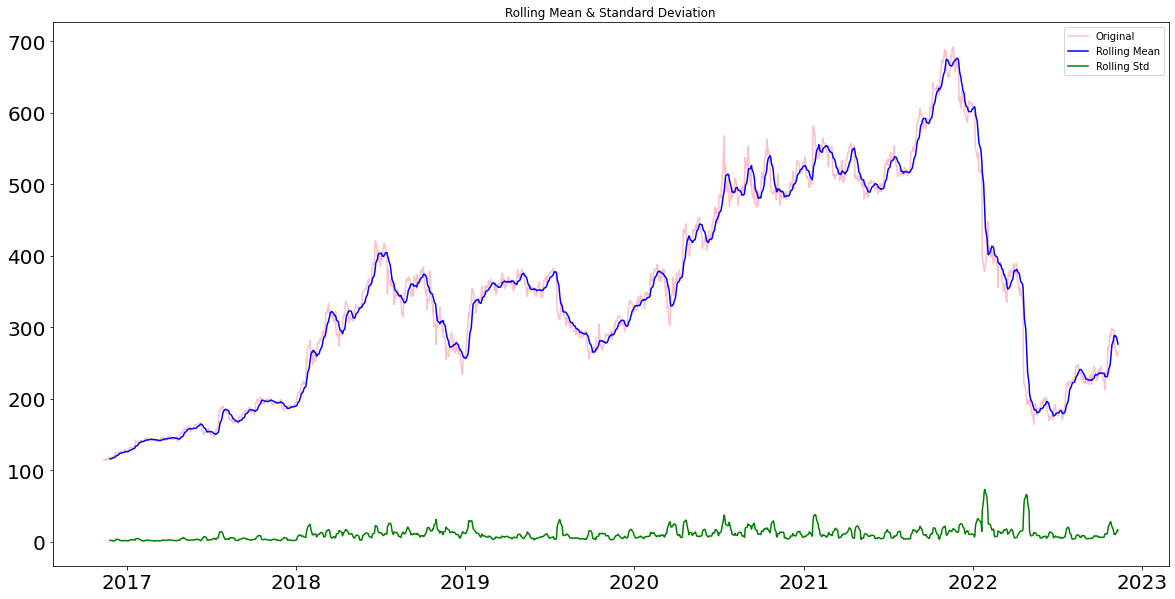

Results of Dickey-Fuller Test:
Test Statistic                   -1.794891
p-value                           0.383001
#Lags Used                        0.000000
Number of Observations Used    1509.000000
Critical Value (1%)              -3.434691
Critical Value (5%)              -2.863457
Critical Value (10%)             -2.567791
dtype: float64


In [17]:
# This is not stationary
# The mean is changing despite a small std
# The test statistic > critical values
test_stationarity(df['Open'])

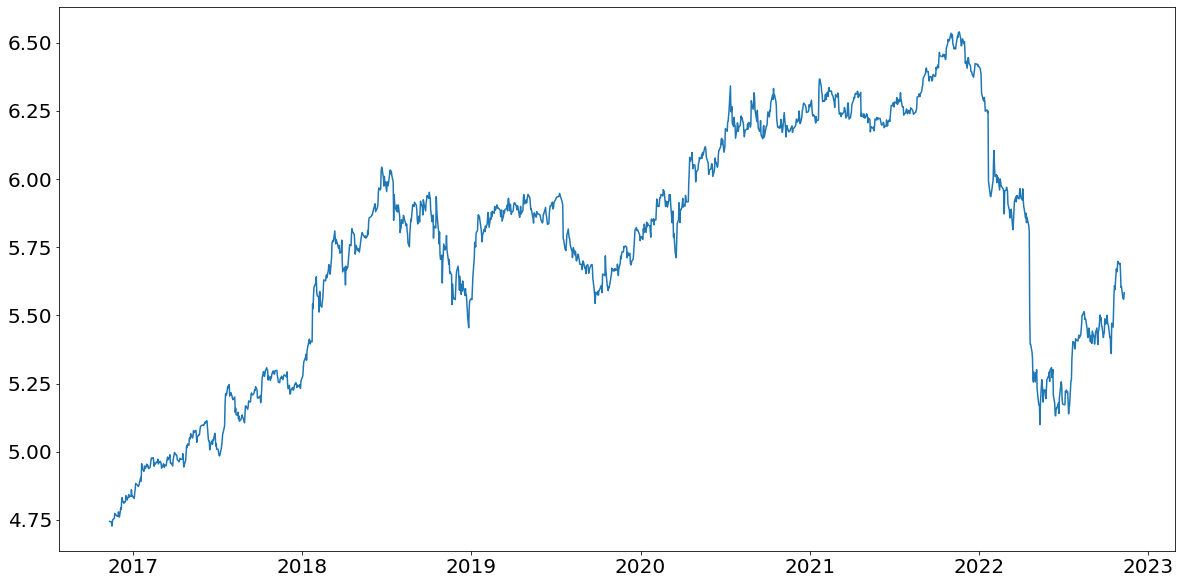

In [18]:
# De-trend with log
plt.figure(figsize=(20,10))
ts_log_open=np.log(df['Open'])
plt.plot(ts_log_open)

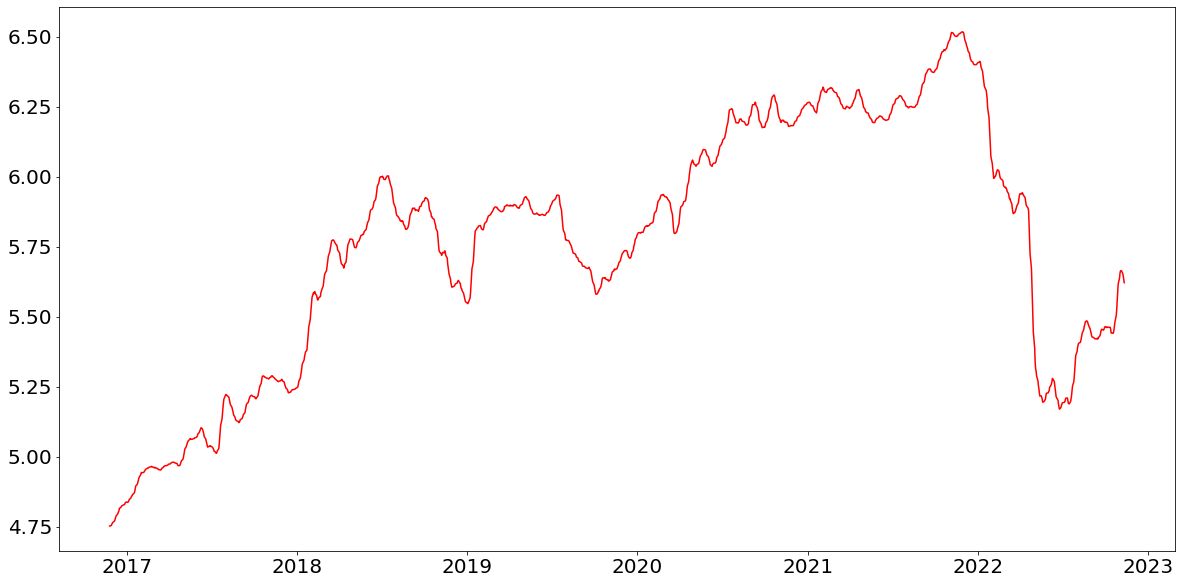

In [19]:
plt.figure(figsize=(20,10))
moving_average_open=ts_log_open.rolling(window = 10).mean()
plt.plot(moving_average_open, color='red')

In [20]:
moving_avg_diff_open= ts_log_open-moving_average_open
moving_avg_diff_open

Date
2016-11-11         NaN
2016-11-14         NaN
2016-11-15         NaN
2016-11-16         NaN
2016-11-17         NaN
                ...   
2022-11-04   -0.058019
2022-11-07   -0.088552
2022-11-08   -0.083035
2022-11-09   -0.072971
2022-11-10   -0.037411
Name: Open, Length: 1510, dtype: float64

In [21]:
moving_avg_diff_open.dropna(inplace=True)
moving_avg_diff_open

Date
2016-11-25    0.015912
2016-11-28    0.009030
2016-11-29    0.008966
2016-11-30    0.019544
2016-12-01    0.003071
                ...   
2022-11-04   -0.058019
2022-11-07   -0.088552
2022-11-08   -0.083035
2022-11-09   -0.072971
2022-11-10   -0.037411
Name: Open, Length: 1501, dtype: float64

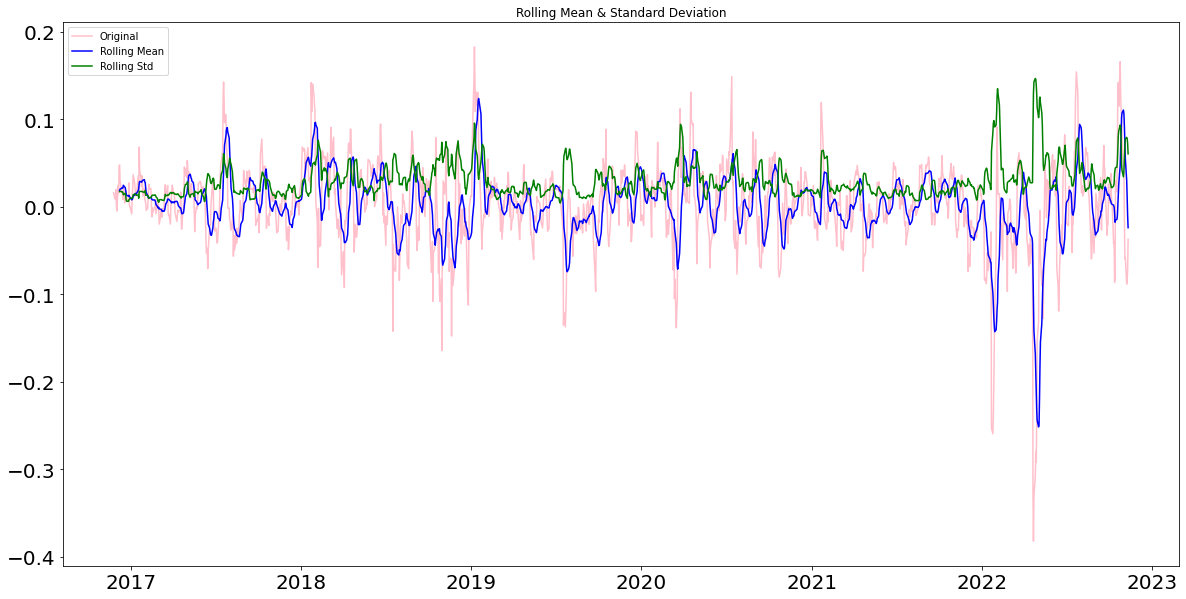

Results of Dickey-Fuller Test:
Test Statistic                -8.559018e+00
p-value                        8.798274e-14
#Lags Used                     9.000000e+00
Number of Observations Used    1.491000e+03
Critical Value (1%)           -3.434743e+00
Critical Value (5%)           -2.863480e+00
Critical Value (10%)          -2.567803e+00
dtype: float64


In [22]:
test_stationarity(moving_avg_diff_open)
# looks stationary now

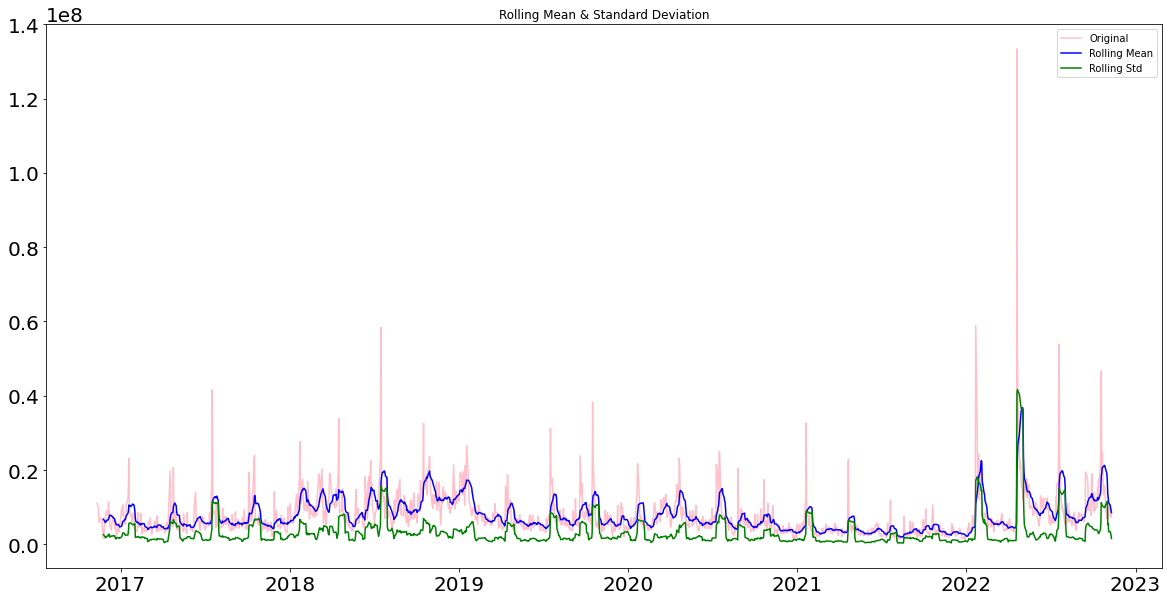

Results of Dickey-Fuller Test:
Test Statistic                -1.065723e+01
p-value                        4.501660e-19
#Lags Used                     4.000000e+00
Number of Observations Used    1.505000e+03
Critical Value (1%)           -3.434702e+00
Critical Value (5%)           -2.863462e+00
Critical Value (10%)          -2.567793e+00
dtype: float64


In [23]:
test_stationarity(df['Volume'])
# Appears to be stationary

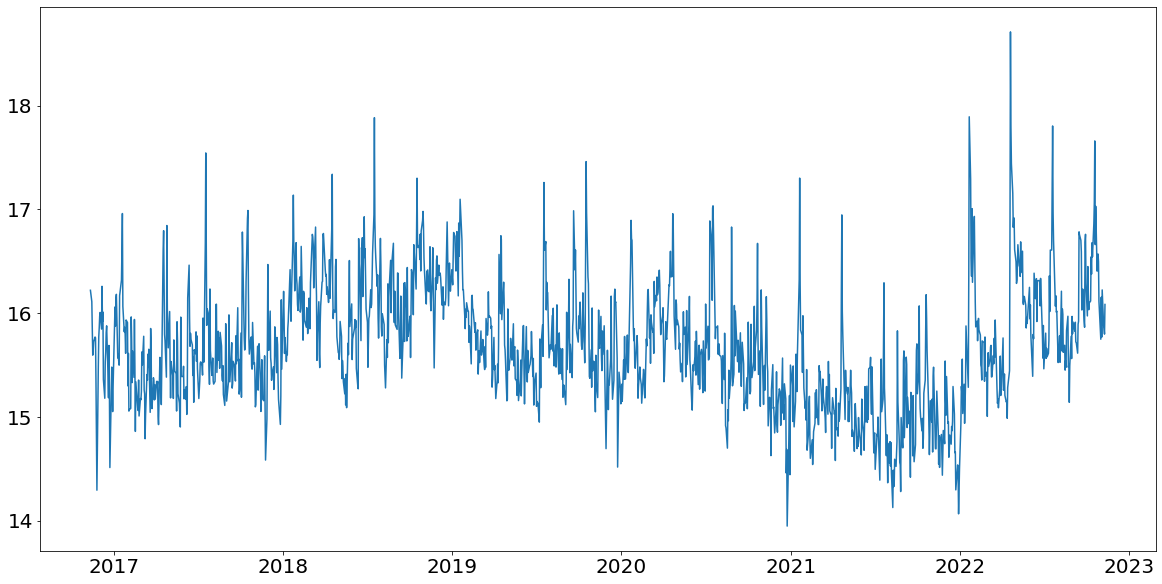

In [24]:
# Detrending with log function
plt.figure(figsize=(20,10))
ts_log=np.log(df['Volume'])
plt.plot(ts_log)

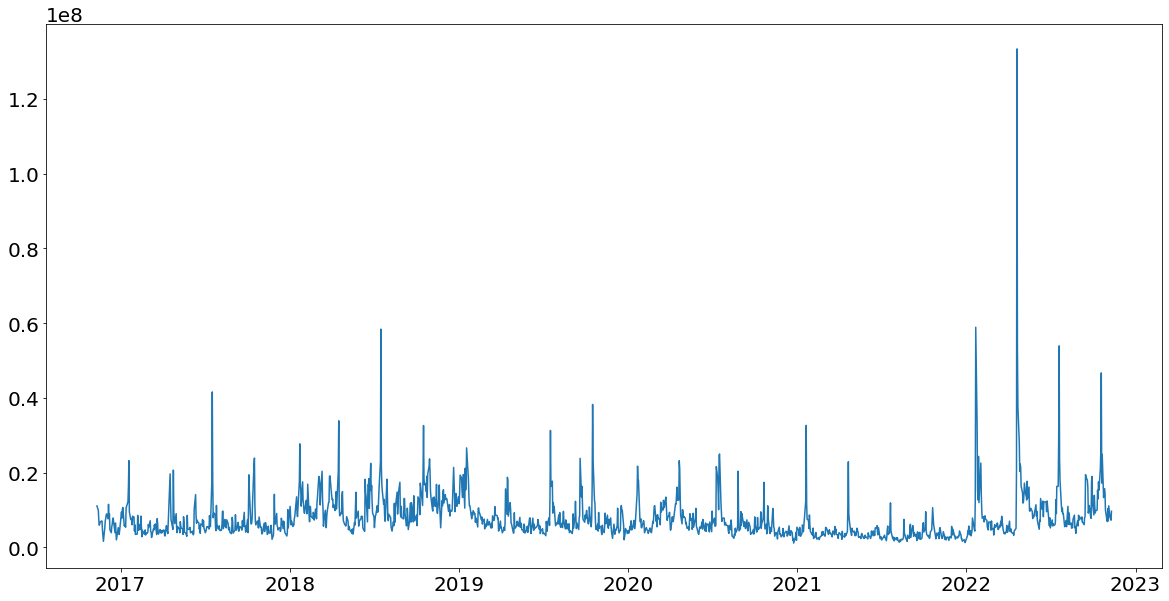

In [25]:
# original volume
plt.figure( figsize=(20,10) )
plt.plot(df['Volume'])

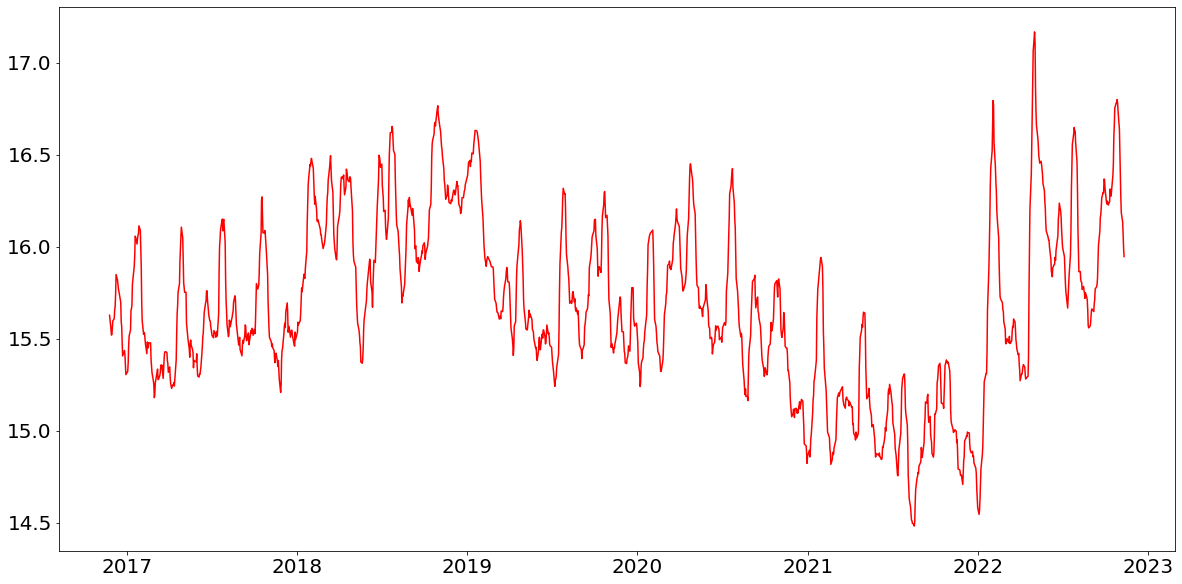

In [26]:
# Rolling mean of volume
plt.figure(figsize=(20,10))
moving_average=ts_log.rolling(window = 10).mean()
plt.plot(moving_average , color='red')

In [27]:
moving_avg_diff= ts_log-moving_average
moving_avg_diff

Date
2016-11-11         NaN
2016-11-14         NaN
2016-11-15         NaN
2016-11-16         NaN
2016-11-17         NaN
                ...   
2022-11-04    0.039626
2022-11-07   -0.246825
2022-11-08   -0.210423
2022-11-09   -0.189196
2022-11-10    0.137661
Name: Volume, Length: 1510, dtype: float64

In [28]:
# Must remove NAs when creating MA
moving_avg_diff.dropna(inplace=True)
moving_avg_diff

Date
2016-11-25   -1.331762
2016-11-28   -0.074038
2016-11-29    0.253663
2016-11-30    0.335681
2016-12-01    0.411006
                ...   
2022-11-04    0.039626
2022-11-07   -0.246825
2022-11-08   -0.210423
2022-11-09   -0.189196
2022-11-10    0.137661
Name: Volume, Length: 1501, dtype: float64

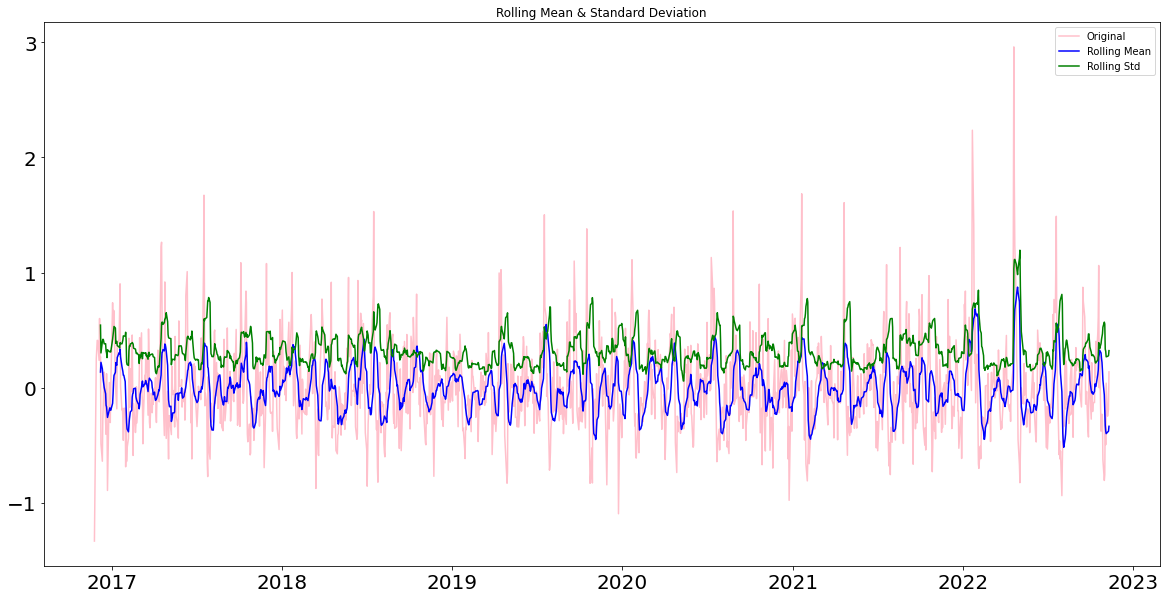

Results of Dickey-Fuller Test:
Test Statistic                -1.063750e+01
p-value                        5.028153e-19
#Lags Used                     2.400000e+01
Number of Observations Used    1.476000e+03
Critical Value (1%)           -3.434788e+00
Critical Value (5%)           -2.863500e+00
Critical Value (10%)          -2.567814e+00
dtype: float64


In [29]:
test_stationarity(moving_avg_diff)

# Still stationary

# Checking for Seasonality

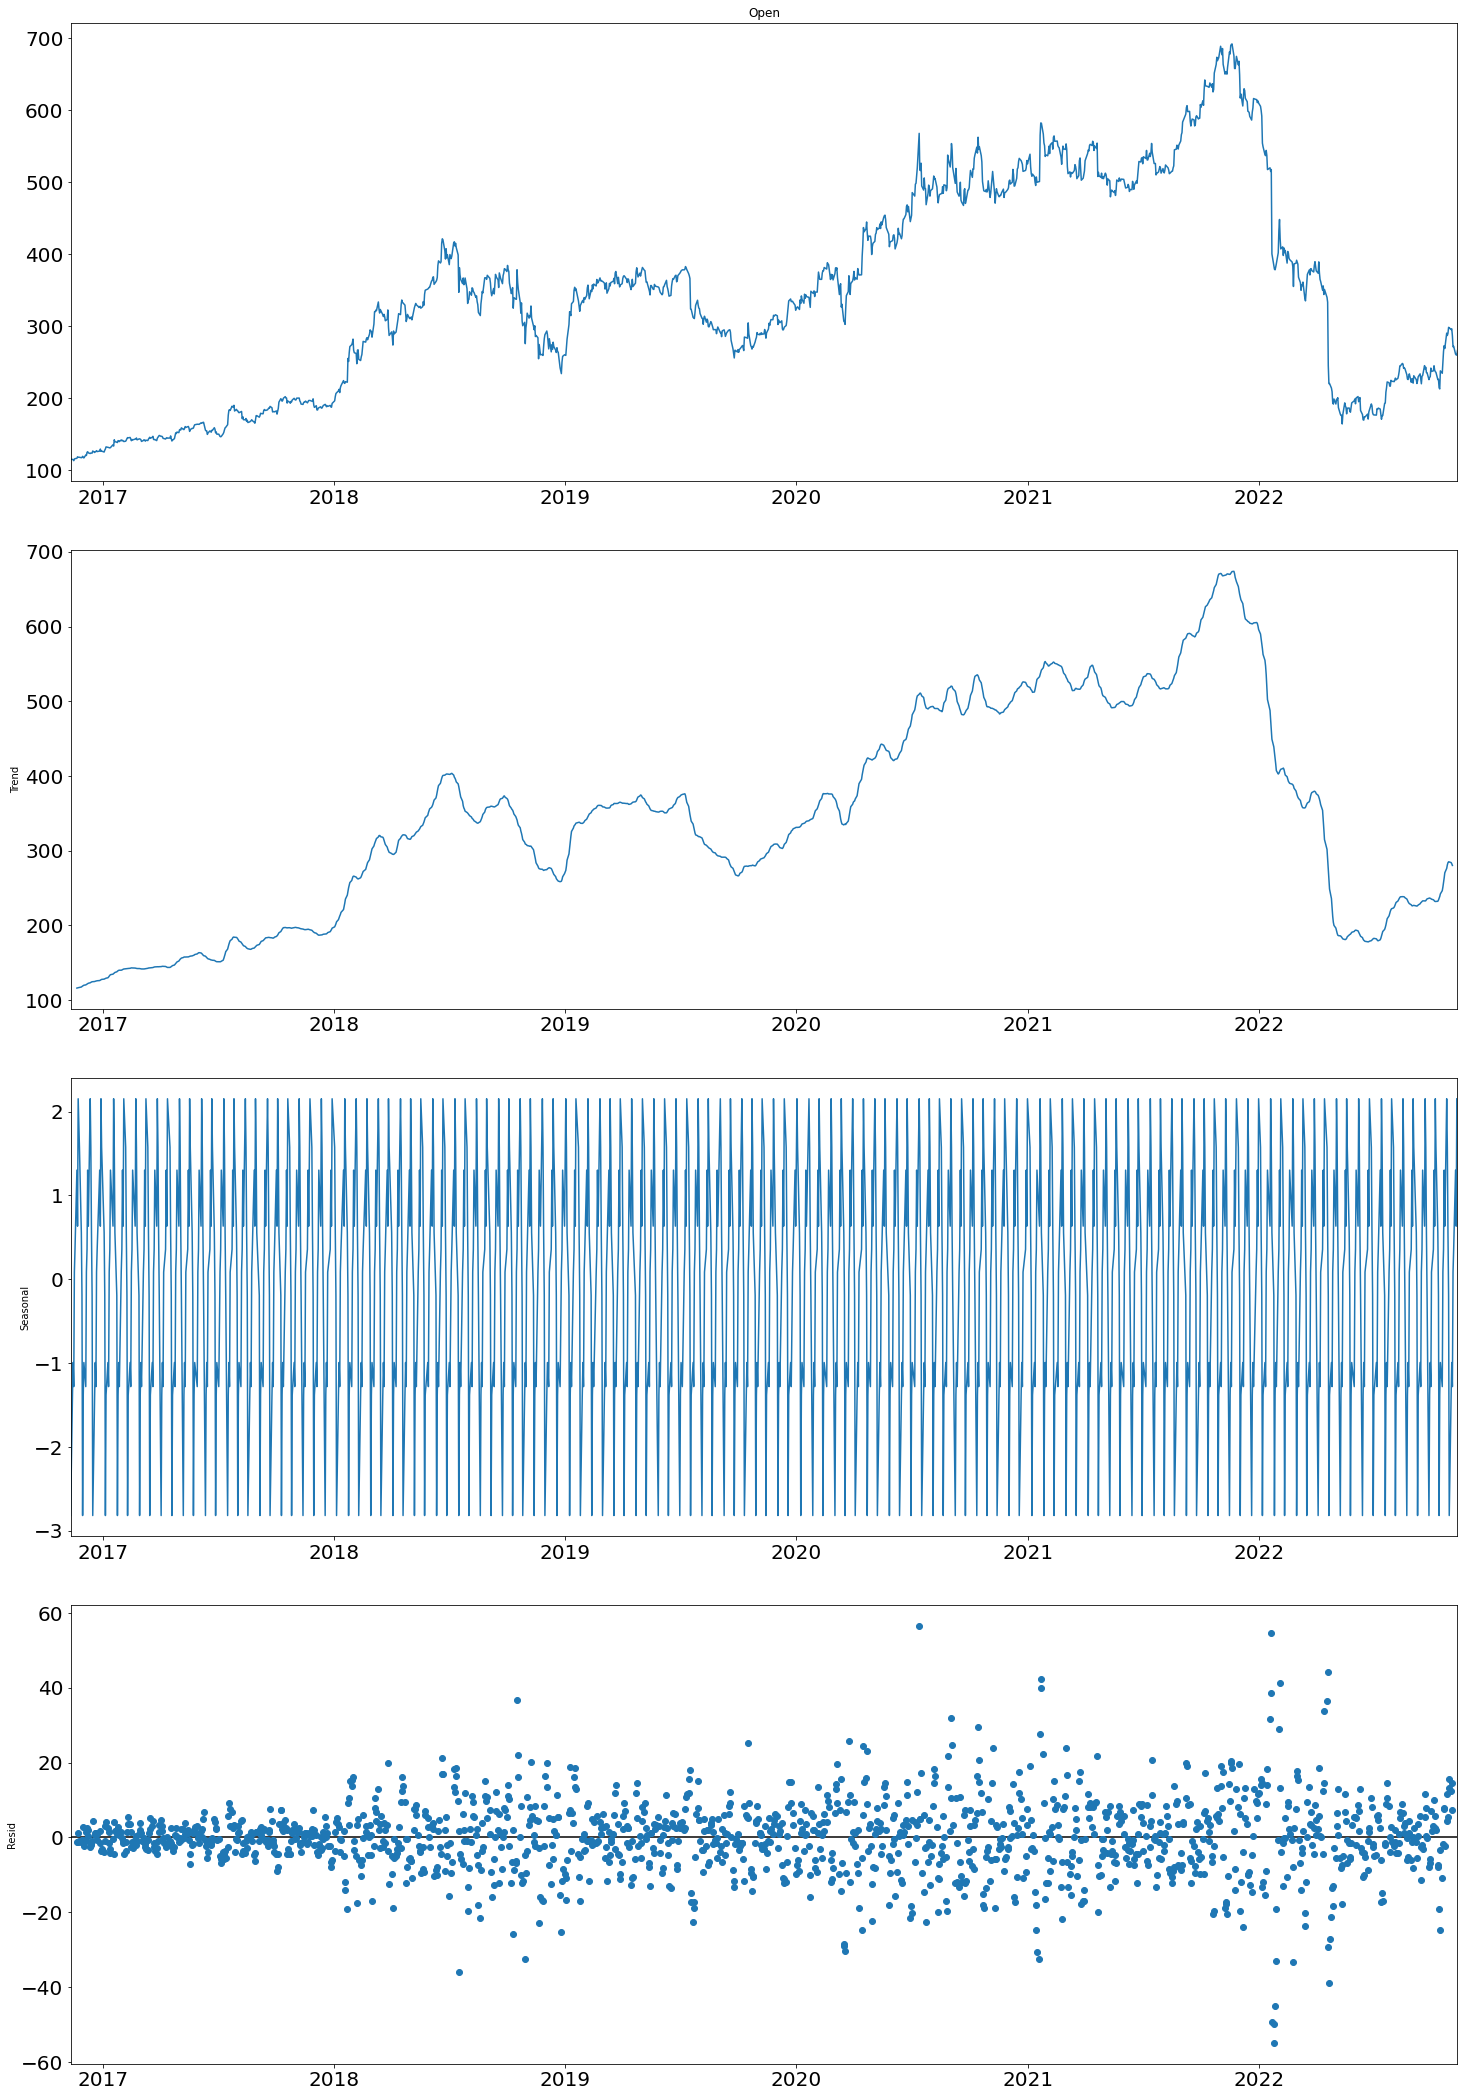

In [30]:
decomp = seasonal_decompose(df['Open'], period=12)
f = decomp.plot()
f.set_figwidth(20)
f.set_figheight(30)
f.show()
#There does not appear to be seasonality in the data, as expected

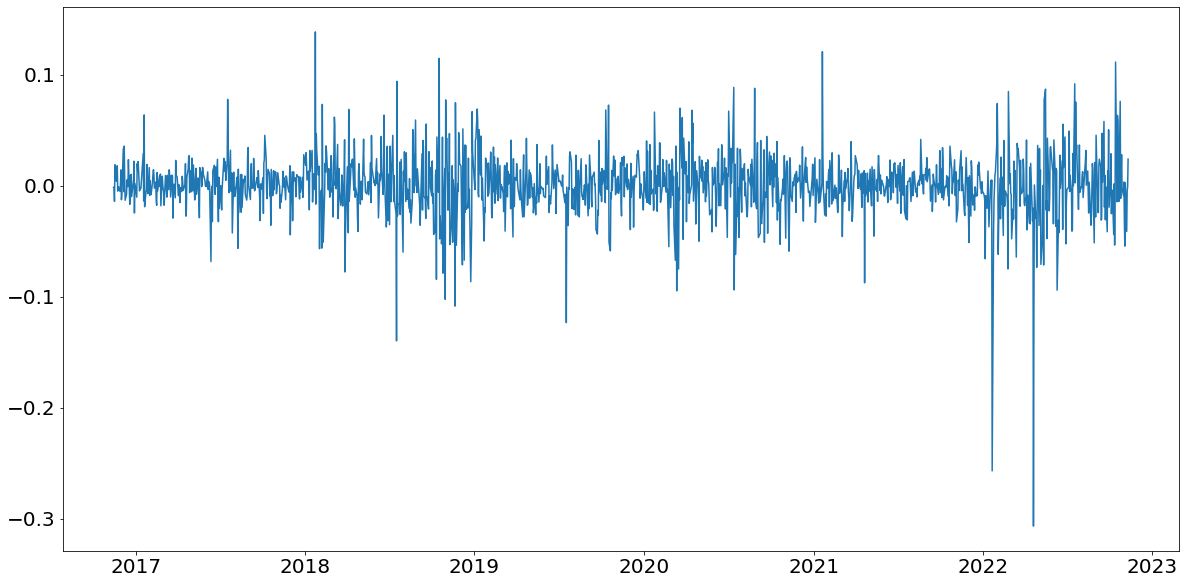

In [31]:
plt.figure(figsize=(20,10))
ts_log_diff_open=ts_log_open-ts_log_open.shift()
plt.plot(ts_log_diff_open)

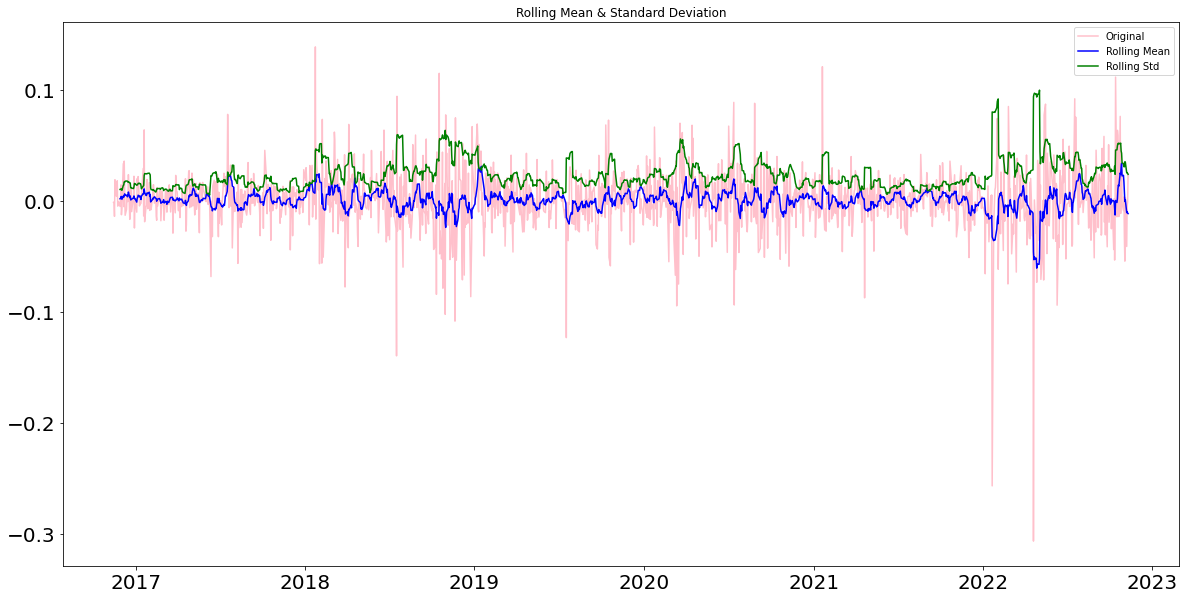

Results of Dickey-Fuller Test:
Test Statistic                  -26.235749
p-value                           0.000000
#Lags Used                        1.000000
Number of Observations Used    1507.000000
Critical Value (1%)              -3.434697
Critical Value (5%)              -2.863460
Critical Value (10%)             -2.567792
dtype: float64


In [32]:
ts_log_diff_open.dropna(inplace=True)
test_stationarity(ts_log_diff_open)

# find p and q

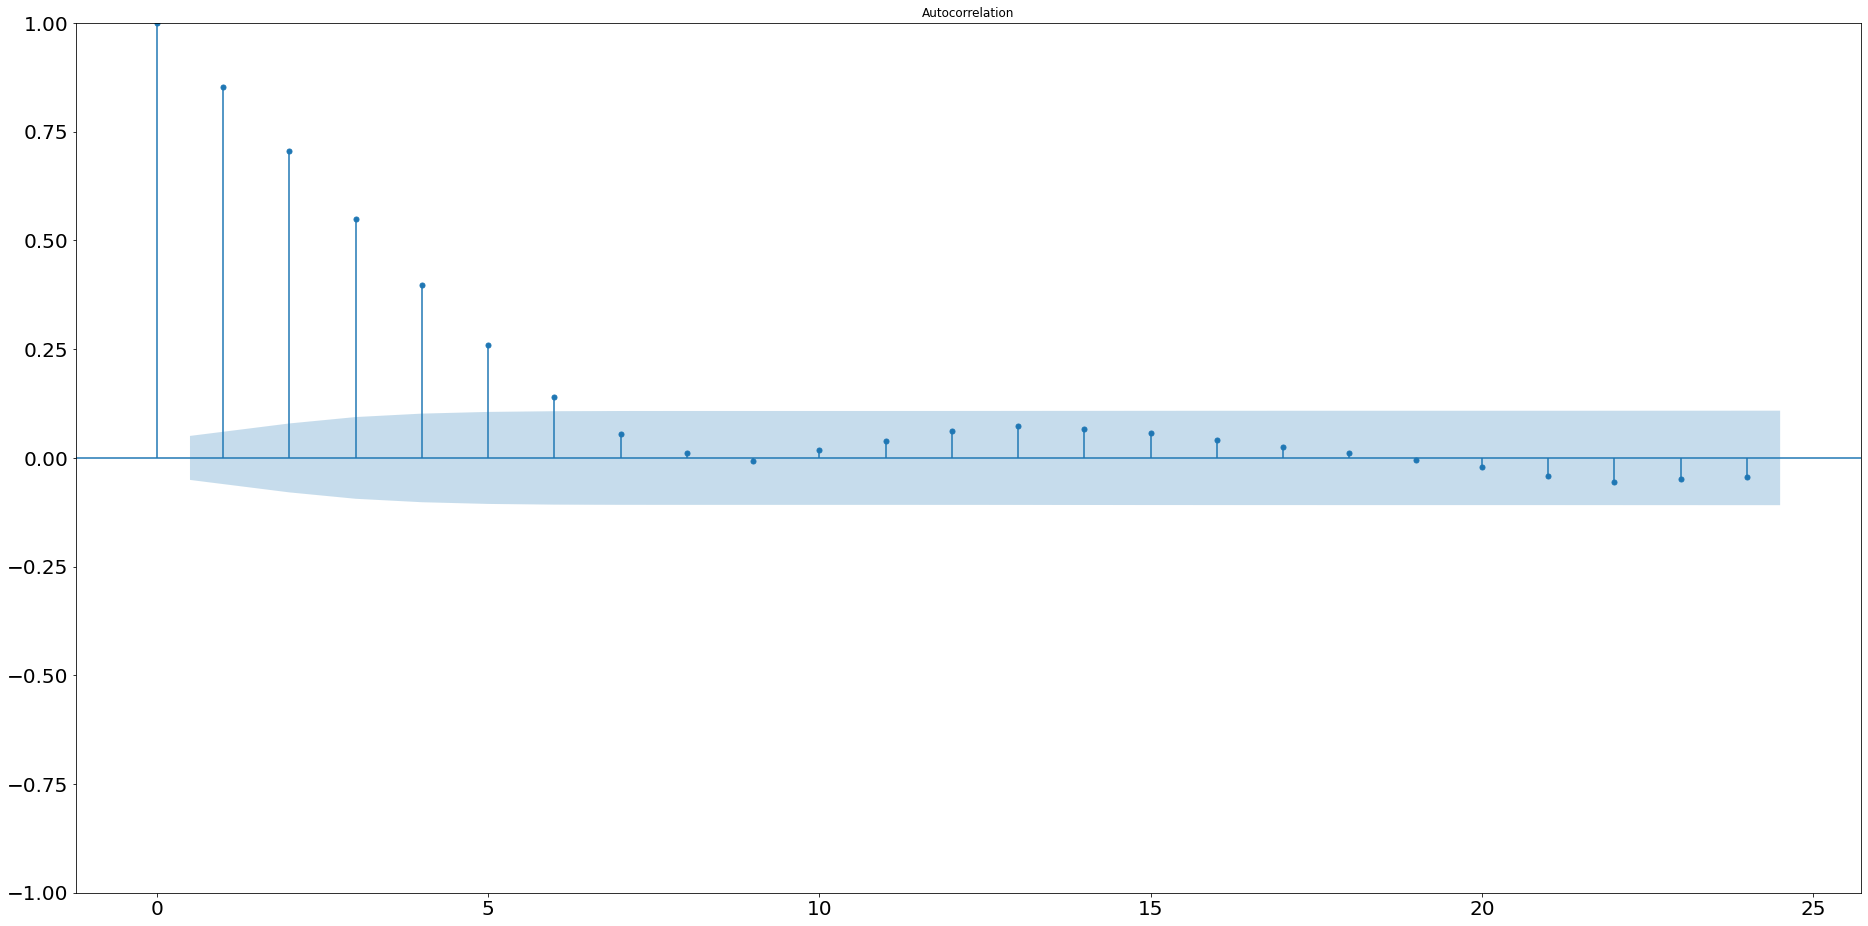

<Figure size 1440x720 with 0 Axes>

In [33]:
# Display the autocorrelation plot of the time series
tsaplots.plot_acf(moving_avg_diff_open, lags=24 )
plt.figure(figsize=(20,10))
plt.show()

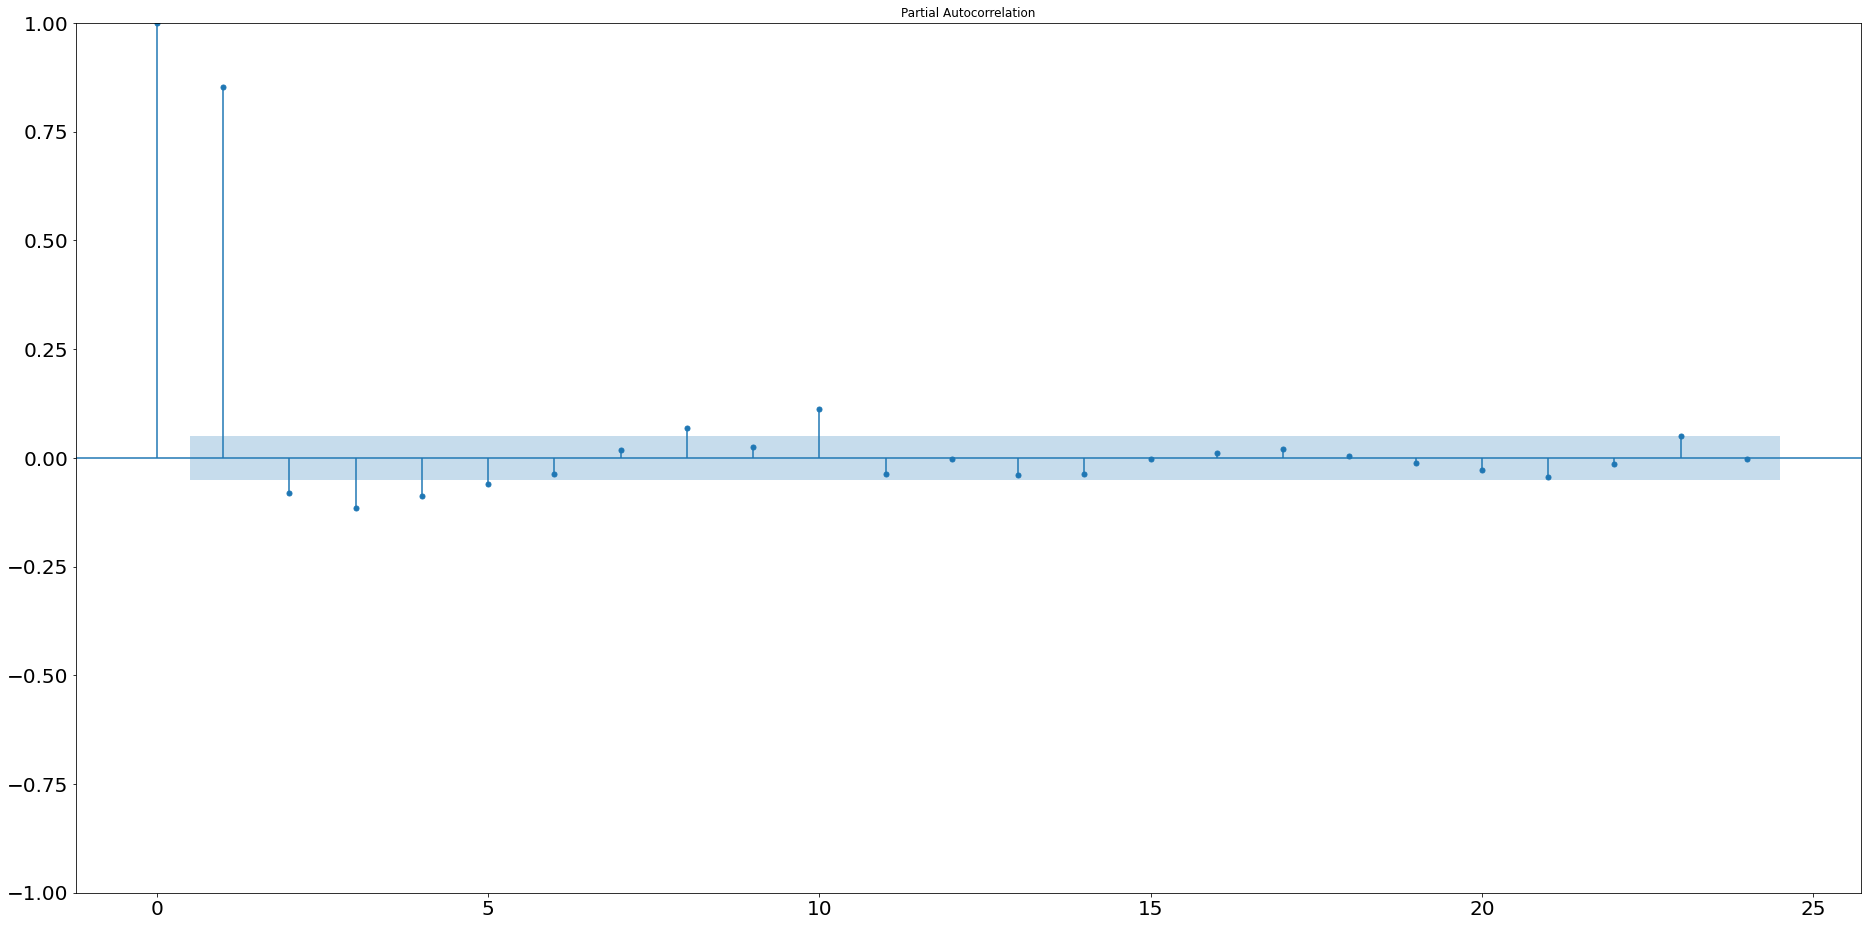

<Figure size 1440x720 with 0 Axes>

In [34]:
# Display the partial autocorrelation plot of the time series
tsaplots.plot_pacf(moving_avg_diff_open, lags=24 )
plt.figure(figsize=(20,10))
plt.show()

# Use box-jenkins / ARIMA to find P and Q

<AxesSubplot:xlabel='Date'>

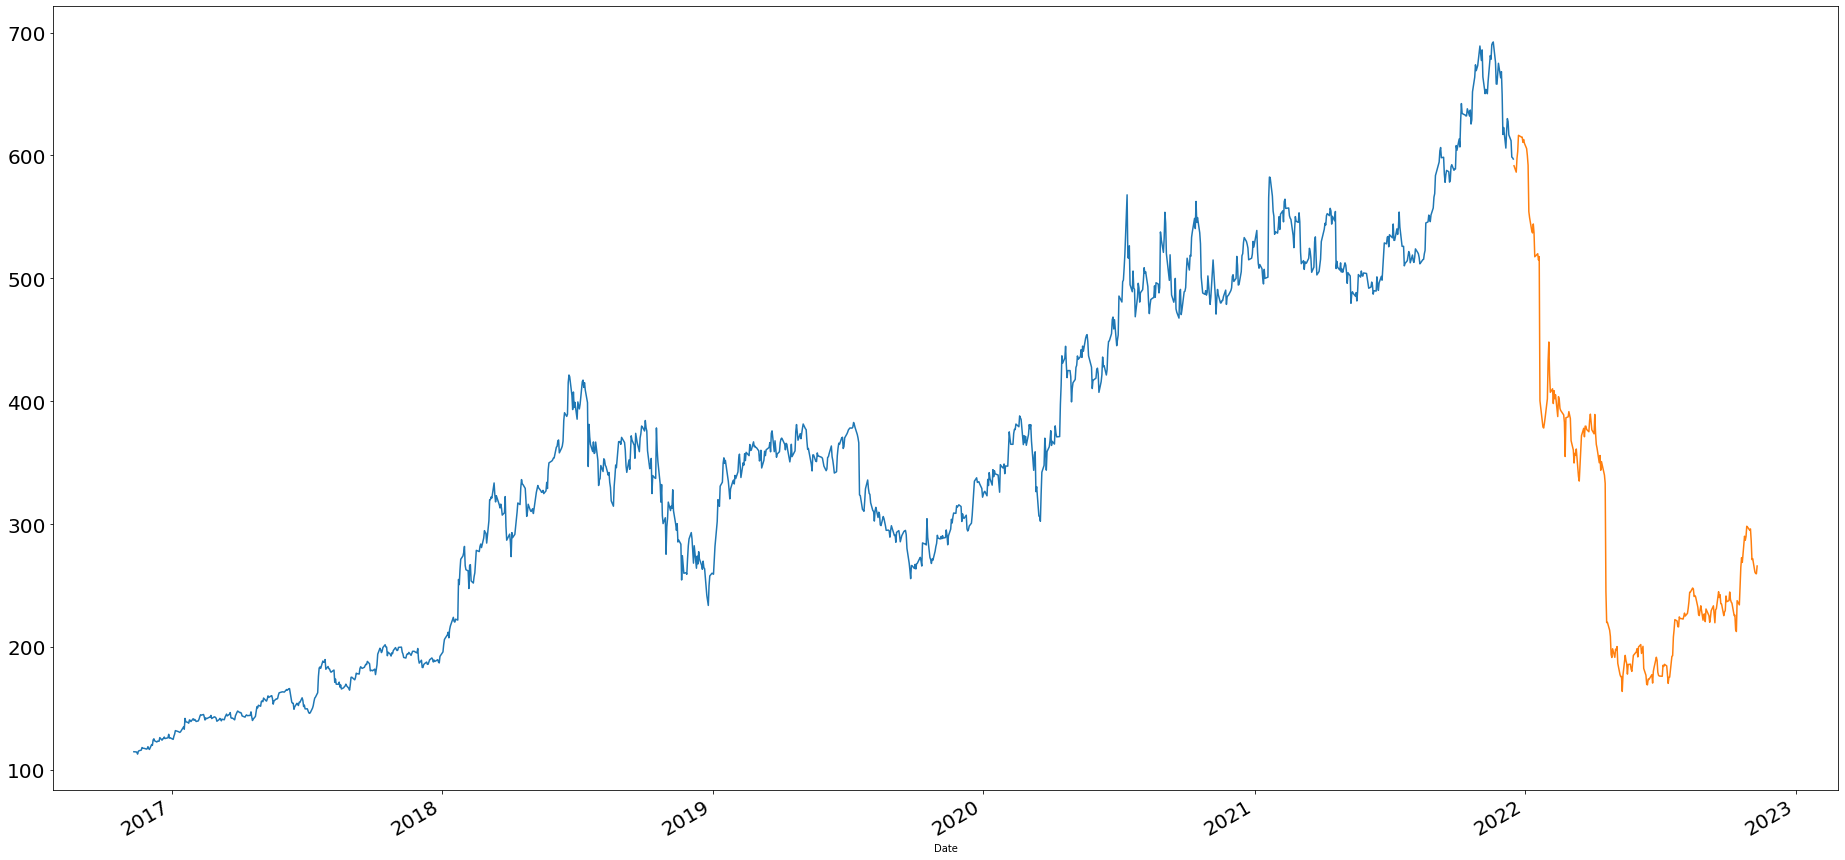

In [35]:
train = df[:int(0.85*(len(df)))]
test = df[int(0.85*(len(df))):]

train['Open'].plot()
test['Open'].plot()

In [36]:
# Determining best fit model for Open by AIC... seems to be ARIMA(2,0,1) with d=0 and ARIMA(0,1,0) with d=1
model = auto_arima(df['Open'], seasonal=False, trend='c',start_p=2, d=1, start_q=0, stepwise=False, trace=True)
print(model.summary())

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11200.690, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11202.690, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=11204.492, Time=0.17 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=11206.295, Time=0.24 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=11206.280, Time=0.31 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=11208.128, Time=0.36 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11202.690, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11204.681, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11206.223, Time=0.48 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=11207.982, Time=0.94 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=11208.229, Time=0.76 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11204.479, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11206.665, Time=0.21 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11206.172, Time=1.04 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=11200.067, Time=1.23

In [37]:
#ARIMA(2,0,1) for 'open'
model = ARIMA(df['Open'], order = (2,1,3))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                 1510
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -5593.107
Date:                Sun, 11 Dec 2022   AIC                          11198.214
Time:                        15:34:00   BIC                          11230.129
Sample:                             0   HQIC                         11210.100
                               - 1510                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1559      0.045     25.523      0.000       1.067       1.245
ar.L2         -0.8958      0.043    -20.682      0.000      -0.981      -0.811
ma.L1         -1.1611      0.051    -22.861      0.0

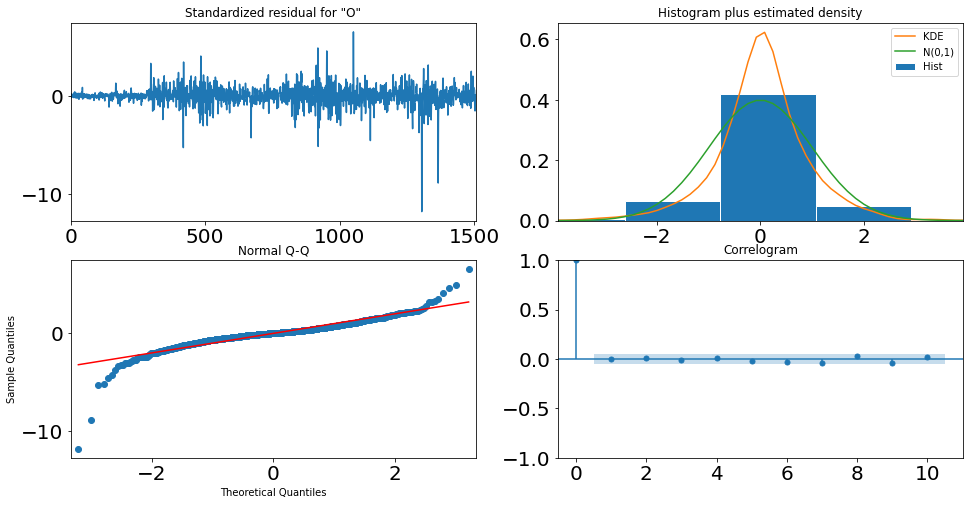

In [38]:
model_fit.plot_diagnostics(figsize=(16, 8))
plt.show()

# Looks normal in Q-Q plot. Correlogram looks like no autocorrelation in residuals. 
# Histogram looks like residuals are not exactly normally distributed but not too bad.

# Forecasting

In [39]:
resultsDict = {}
predictionsDict = {}
# Walk through the test data, training and predicting 1 day ahead for all the test data
index = len(train)
yhat = list()
for t in tqdm(range(len(test))):
    temp_train = df[:len(train)+t]
    model = AutoReg(temp_train.Open, lags=10)
    model_fit = model.fit()
    predictions = model_fit.predict(
        start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat + [predictions]

    
yhat = pd.concat(yhat)
predictionsDict['MA'] = yhat.values

100%|███████████████████████████████████████████████████████████████████████████████| 227/227 [00:00<00:00, 277.10it/s]


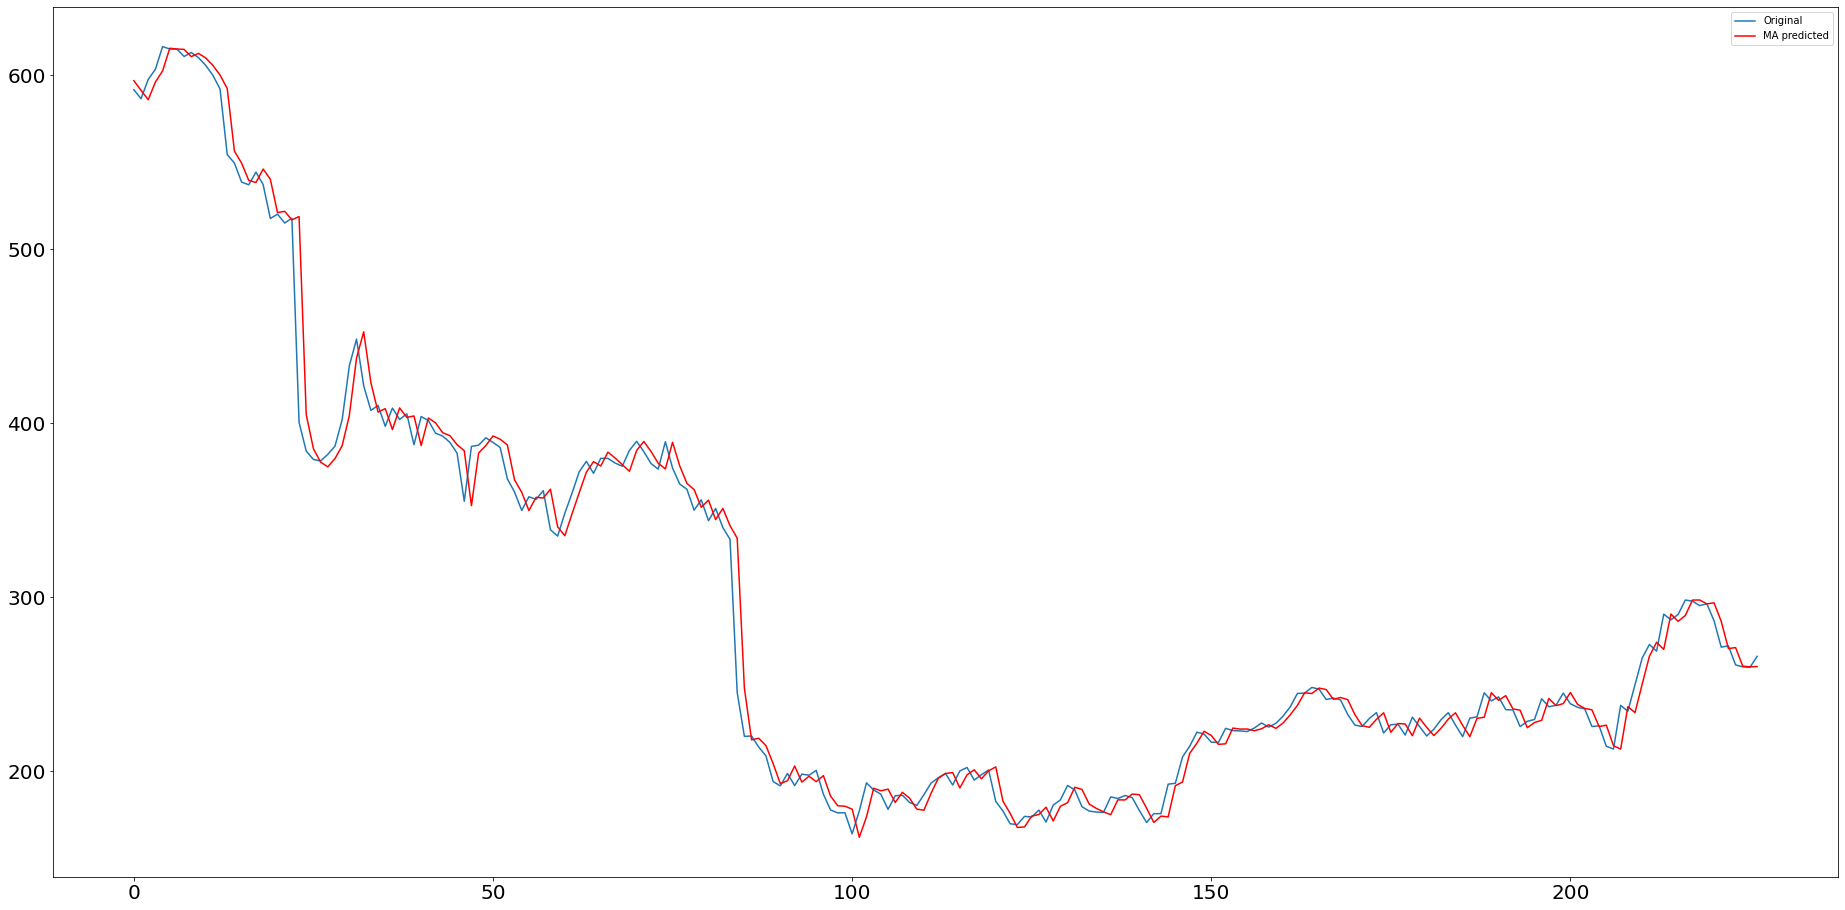

In [46]:
plt.rcParams["figure.figsize"] = (32,16)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.plot(test.Open.values, label='Original')
plt.plot(yhat.values, color='red', label='MA predicted')
plt.legend()


In [41]:
order = (2,1,3)
yhat = list()
x = np.arange(1283, 1510, 1, dtype=int)
x2 = np.arange(0,1510,1,dtype=int)

for t in tqdm(range(len(test.Open))):
    temp_train = df[:len(train)+t]
    model = ARIMA(temp_train.Open, order=order)
    model_fit = model.fit()
    predictions = model_fit.predict(
        start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)

predictionsDict['AutoARIMA {0}'.format(order)] = yhat.values


100%|████████████████████████████████████████████████████████████████████████████████| 227/227 [02:02<00:00,  1.85it/s]


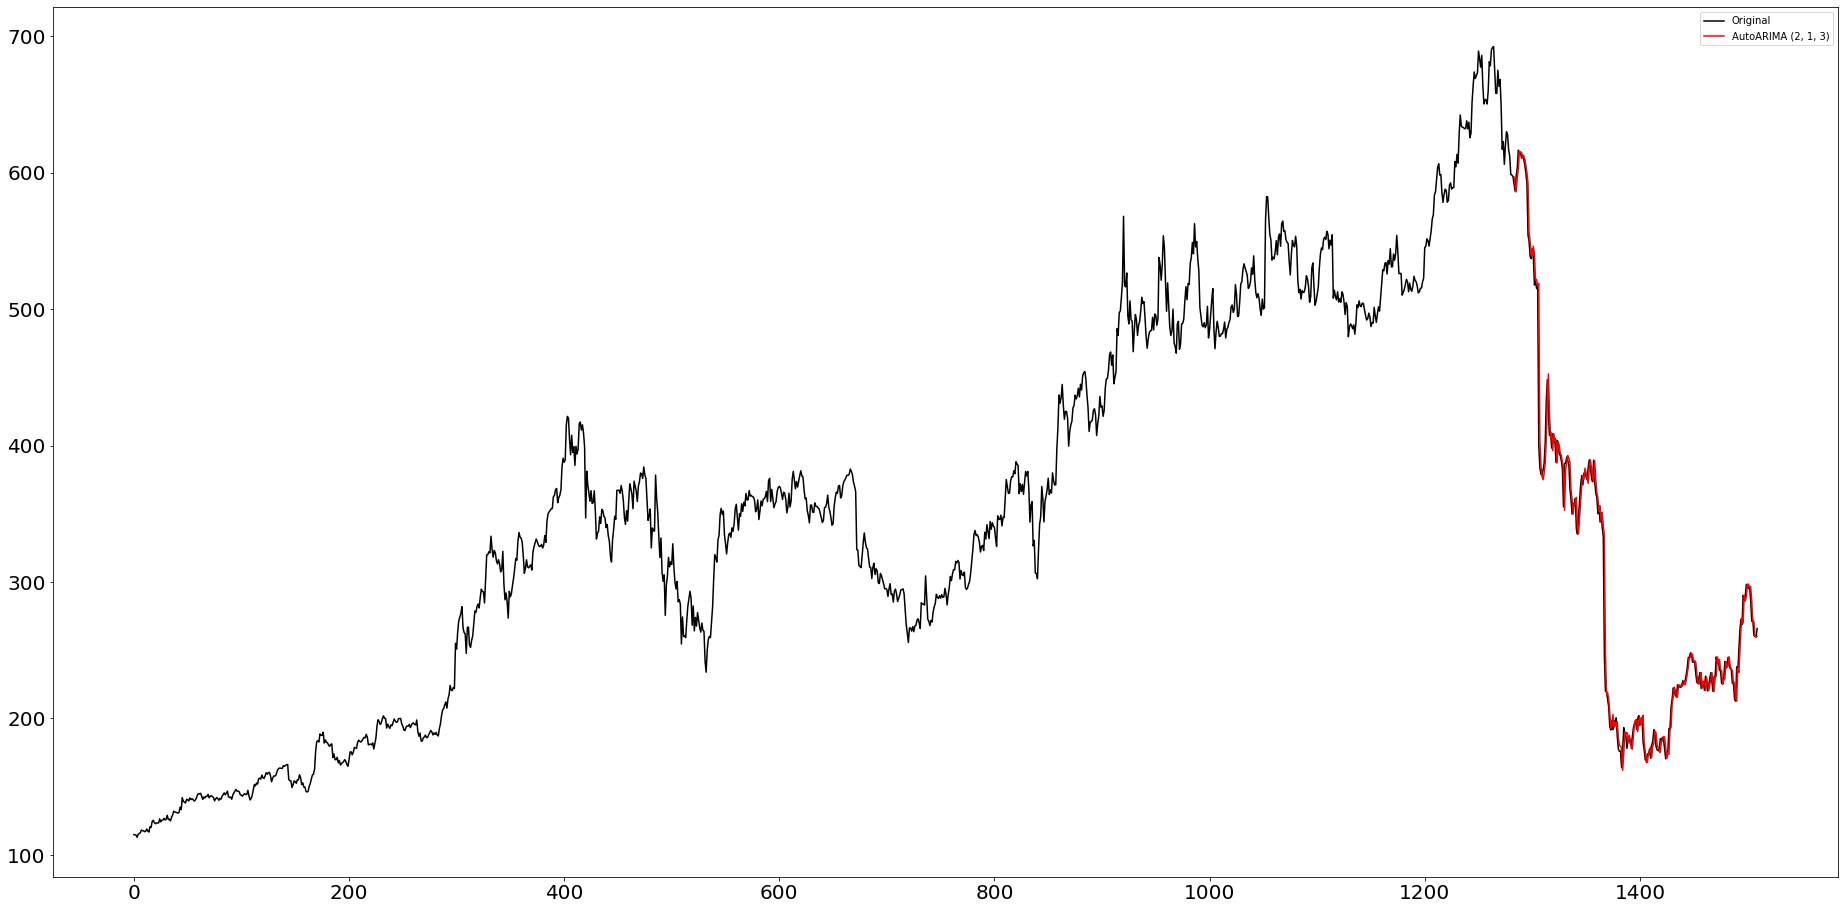

In [42]:
plt.plot(x2,df['Open'], color='black', label='Original')
#plt.plot(test.Open.values, label='Original Test')
plt.plot(x, yhat.values, color='red', label='AutoARIMA {0}'.format(order))
plt.legend()


In [43]:
"""import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train.Open, order=(2, 0, 1))  
fitted = model.fit()
print(fitted.summary())
"""

'import statsmodels.api as sm\nmodel = sm.tsa.arima.ARIMA(train.Open, order=(2, 0, 1))  \nfitted = model.fit()\nprint(fitted.summary())\n'

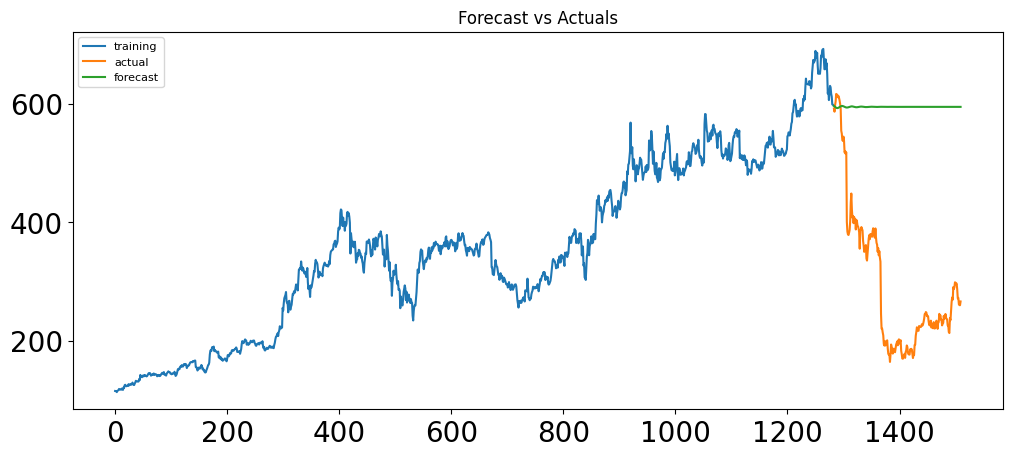

In [44]:
train2 = df2[:int(0.85*(len(df2)))]
test2 = df2[int(0.85*(len(df2))):]

# Build Model
model = ARIMA(train2['Open'], order=(2, 1, 3))  
fitted = model.fit()  

# Forecast
fc = fitted.predict(start = 1284, end = 1510, alpha=0.05)

# Make as pandas series
fc_series = pd.Series(fc.values, index=test2.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train2['Open'], label='training')
plt.plot(test2['Open'], label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


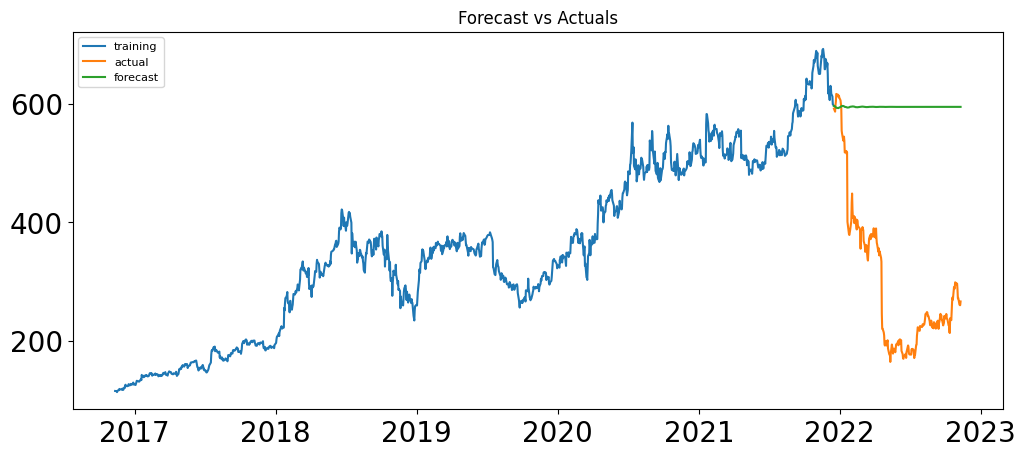

In [45]:
# Build Model 
model = ARIMA(train['Open'], order=(2,1,3))  
fitted = model.fit()  

# Forecast
fc = fitted.predict(start = 1284, end = 1510, alpha=0.05)

# Make as pandas series
fc_series = pd.Series(fc.values, index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train['Open'], label='training')
plt.plot(test['Open'], label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
